In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for text / string processing
import re

# for plotting
import matplotlib.pyplot as plt
% matplotlib inline

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


In [2]:
data=pd.read_csv('bank_marketing.csv', sep=';')
data.sample(5)

,age,job,marital_status,education,default,balance,housing,loan,contact_type,day,month,campaing_contacts,last_contact,previous_contacts,previous_conversion,conversion
186,34,2.0,married,3.0,0,899.0,1,0,1.0,19,11,3,7.0,4,1.0,0
245,36,2.0,married,3.0,0,0.0,1,0,0.0,28,1,1,250.0,1,NaN,0
3023,55,1.0,married,2.0,1,-308.0,0,0,0.0,2,2,1,NaN,0,NaN,1
2971,32,2.0,single,3.0,0,1160.0,1,1,NaN,11,6,2,NaN,0,NaN,0
3397,38,2.0,single,3.0,0,0.0,0,0,0.0,24,7,1,NaN,0,NaN,0


# Data Understanding

### Bank wants to increase the conversion rate of telemarketing campaigns in banks.
* The bank telemarketing database used here is related with direct marketing campaigns of a bank institution.
* Telemarketing is an interactive technique of direct marketing via the phone which is widely used by banks to sell long-term deposits
* The aim of this study is to predict whether a client is going to subscribe a long-term deposit or not.

In [3]:
data.describe()

,age,job,education,default,balance,housing,loan,contact_type,day,month,campaing_contacts,last_contact,previous_contacts,previous_conversion,conversion
count,4120.000000,4085.000000,3949.000000,4120.000000,4115.000000,4120.000000,4120.000000,2921.000000,4120.000000,4120.000000,4120.000000,739.000000,4120.000000,561.000000,4120.000000
mean,41.224029,1.392901,2.154469,0.017476,1439.810693,0.566019,0.152913,0.095173,15.962621,6.176214,2.806311,223.669824,0.541262,0.204991,0.114563
std,10.550958,0.661372,0.667257,0.131051,3069.116870,0.495682,0.359947,0.293504,8.258247,2.388879,3.139139,114.778020,1.709618,0.404055,0.318533
min,19.000000,0.000000,1.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,2.000000,0.000000,67.000000,0.000000,0.000000,0.000000,9.000000,5.000000,1.000000,137.500000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,2.000000,0.000000,442.000000,1.000000,0.000000,0.000000,16.000000,6.000000,2.000000,189.000000,0.000000,0.000000,0.000000
75%,49.000000,2.000000,3.000000,0.000000,1492.500000,1.000000,0.000000,0.000000,21.000000,8.000000,3.000000,326.500000,0.000000,0.000000,0.000000
max,87.000000,2.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,1.000000,31.000000,12.000000,50.000000,871.000000,25.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 16 columns):
age                    4120 non-null int64
job                    4085 non-null float64
marital_status         4120 non-null object
education              3949 non-null float64
default                4120 non-null int64
balance                4115 non-null float64
housing                4120 non-null int64
loan                   4120 non-null int64
contact_type           2921 non-null float64
day                    4120 non-null int64
month                  4120 non-null int64
campaing_contacts      4120 non-null int64
last_contact           739 non-null float64
previous_contacts      4120 non-null int64
previous_conversion    561 non-null float64
conversion             4120 non-null int64
dtypes: float64(6), int64(9), object(1)
memory usage: 515.1+ KB


The variables are:
* age: Age.
* job: job
* married: Marital status.
* single: Marital status.
* divorced: Marital status.
* education: Type of education (primary, secondary, tertiary).
* default: Takes value 1 if the client has a credit in default and 0 in other case.
* balance: Account balance.
* housing: Takes value 1 if the client has a housing loan and 0 in other case.
* loan: Takes value 1 if the client has a personal loan and 0 in other case.
* contact_type: Contact communication type (cellular, telephone).
* day: Last contact day of the week.
* month: Last contact month of the year.
* campaign: Number of contacts performed during this campaign and for this client.
* last_contact: Number of days that passed by after the client was last contacted from a previous campaign.
* previous_conversation: Number of contacts performed before this campaign and for this client.
* previous_conversation: Outcome of the previous marketing campaign.
* conversion: Takes value 1 if the client has subscribed a term deposit and 0 in other case, used as target.

In [5]:
data.corr()*100

,age,job,education,default,balance,housing,loan,contact_type,day,month,campaing_contacts,last_contact,previous_contacts,previous_conversion,conversion
age,100.000000,-18.236168,-18.961716,-1.810755,8.151596,-19.085623,-0.767997,20.490362,-1.262613,6.824704,-0.690654,-8.868760,-0.751807,10.182685,3.230880
job,-18.236168,100.000000,34.438472,0.200060,-0.157667,9.134992,3.575933,-7.692313,1.049546,6.450900,3.863862,6.608414,-0.637508,-6.390807,-2.732119
education,-18.961716,34.438472,100.000000,-0.770089,5.664800,-7.055855,-1.913512,-11.834879,1.065955,9.370926,0.485267,-12.357582,2.714272,2.895583,5.173534
default,-1.810755,0.200060,-0.770089,100.000000,-7.078253,0.092164,6.685696,-2.293055,-1.352878,1.032371,-1.537574,4.893202,-2.814192,-2.145791,0.437035
balance,8.151596,-0.157667,5.664800,-7.078253,100.000000,-4.557621,-7.510929,3.607731,-0.774948,10.364984,-1.116306,-7.779724,2.264879,2.123838,1.386927
housing,-19.085623,9.134992,-7.055855,0.092164,-4.557621,100.000000,1.416197,-4.311049,-4.150603,-16.892773,-0.457411,30.745476,4.949836,-32.326785,-9.711826
loan,-0.767997,3.575933,-1.913512,6.685696,-7.510929,1.416197,100.000000,-0.267512,-0.118030,3.359460,0.859969,-0.477199,-2.327485,-12.294020,-6.812886
contact_type,20.490362,-7.692313,-11.834879,-2.293055,3.607731,-4.311049,-0.267512,100.000000,5.239042,-1.784373,3.346454,-7.644228,-1.136351,4.179447,0.040791
day,-1.262613,1.049546,1.065955,-1.352878,-0.774948,-4.150603,-0.118030,5.239042,100.000000,8.548099,16.379618,-14.627385,-5.768567,0.224263,-0.584740
month,6.824704,6.450900,9.370926,1.032371,10.364984,-16.892773,3.359460,-1.784373,8.548099,100.000000,6.156401,-17.749440,-4.279778,8.931031,1.844982


### Handling missing values

In [6]:
data.isnull().mean() * 100  # finding the total percentage of missing values in columns. >80% not worth filling up

age                     0.000000
job                     0.849515
marital_status          0.000000
education               4.150485
default                 0.000000
balance                 0.121359
housing                 0.000000
loan                    0.000000
contact_type           29.101942
day                     0.000000
month                   0.000000
campaing_contacts       0.000000
last_contact           82.063107
previous_contacts       0.000000
previous_conversion    86.383495
conversion              0.000000
dtype: float64

In [7]:
data.drop(data[['last_contact','previous_conversion']], axis =1, inplace=True) #>80% missing values not worth filling up


In [8]:
data['job'].fillna(data['job'].mode()[0], inplace=True) # descrete category filled with mode
data['education'].fillna(data['education'].mode()[0], inplace=True) # descrete variable filled with mode
data['balance'].fillna(data['balance'].mean(), inplace=True) # continous numeric variable filled with mean
data['contact_type'].fillna(data['contact_type'].mode()[0], inplace=True) # descrete category filled with mode
data.isnull().sum()

age                  0
job                  0
marital_status       0
education            0
default              0
balance              0
housing              0
loan                 0
contact_type         0
day                  0
month                0
campaing_contacts    0
previous_contacts    0
conversion           0
dtype: int64

* “conversion” has a +10 correlation with “previous contacts”, +5% with education, +3% with age, 2% wtih contact_type and marital status.
* "conversion" has -9% correlation with housing, -6% with loan and -6% with campaing_contacts, -2% with job

###  Data Types

In [9]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))   # marital status
print(data['marital_status'].unique())
marital= data['marital_status'].value_counts()
marital

There are 1 categorical variables
['married' 'single' 'divorced']


married     2540
single      1100
divorced     480
Name: marital_status, dtype: int64

In [10]:
numeric = [num for num in data.columns if data[num].dtype!='O']
print('There are {} numeric variables'.format(len(numeric)))

There are 13 numeric variables


In [11]:
# let's visualise the values of the discrete variables 
# from all the numerical ones, those that contain a finite and small number of distinct values

discrete=[]
for var in numeric:
    if len(data[var].unique())<45:
        print (var, ' values: ', data[var].unique())
        discrete.append(var)
print('There are {} discrete variables'.format(len(discrete)))

job  values:  [0. 2. 1.]
education  values:  [1. 2. 3.]
default  values:  [0 1]
housing  values:  [0 1]
loan  values:  [0 1]
contact_type  values:  [0. 1.]
day  values:  [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
month  values:  [10  5  4  6  2  8  1  7 11  9  3 12]
campaing_contacts  values:  [ 1  4  2  5  3  6 18 10  9  7 12 14 13 24 11  8 29 32 16 22 25 21 15 17
 19 23 20 50 28 31 44]
previous_contacts  values:  [ 0  4  1  3  2  5 20  7  6 10  9  8 18 19 12 13 11 14 15 24 17 22 23 25]
conversion  values:  [0 1]
There are 11 discrete variables


In [12]:
# let's visualise the values of the discrete variables
for var in discrete:
    print(var, ' values: ', data[var].unique())

job  values:  [0. 2. 1.]
education  values:  [1. 2. 3.]
default  values:  [0 1]
housing  values:  [0 1]
loan  values:  [0 1]
contact_type  values:  [0. 1.]
day  values:  [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
month  values:  [10  5  4  6  2  8  1  7 11  9  3 12]
campaing_contacts  values:  [ 1  4  2  5  3  6 18 10  9  7 12 14 13 24 11  8 29 32 16 22 25 21 15 17
 19 23 20 50 28 31 44]
previous_contacts  values:  [ 0  4  1  3  2  5 20  7  6 10  9  8 18 19 12 13 11 14 15 24 17 22 23 25]
conversion  values:  [0 1]


In [13]:
# seperating continous variables (only inputs)
continuous = [var for var in numeric if var not in discrete and var not in ['conversion']]
continuous

['age', 'balance']

### Encoding categorical data

In [14]:
#Categorical boolean mask
categorical_feature_mask = data.dtypes=='object'
#filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()

In [15]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(3)# apply OneHotEncoder on categorical feature columns

,marital_status
0,1
1,1
2,2


In [16]:
# import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# instantiate OneHotEncoder
ohe = OneHotEncoder(categorical_features = categorical_feature_mask, sparse=False ) 
#categorical_features = boolean mask for categorical columns
#sparse = False output an array not sparse matrix
# apply OneHotEncoder on categorical feature columns
X_ohe = ohe.fit_transform(data) # It returns an numpy array
data.head()

D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,age,job,marital_status,education,default,balance,housing,loan,contact_type,day,month,campaing_contacts,previous_contacts,conversion
0,30,0.0,1,1.0,0,1787.0,0,0,0.0,19,10,1,0,0
1,33,2.0,1,2.0,0,4789.0,1,1,0.0,11,5,1,4,0
2,35,2.0,2,3.0,0,1350.0,1,0,0.0,16,4,1,1,0
3,30,2.0,1,3.0,0,1476.0,1,1,0.0,3,6,4,0,0
4,59,1.0,1,2.0,0,0.0,1,0,0.0,5,5,1,0,0


In [17]:
print(data['marital_status'].unique())

[1 2 0]


In [18]:
ohe_marital= data['marital_status'].value_counts()  
ohe_marital

1    2540
2    1100
0     480
Name: marital_status, dtype: int64

##### married     2540 , single      1100, divorced     480

### Outliers

In [19]:
# finding the outliers
Q1 = data.quantile(0.25) 
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                    16.00
job                     1.00
marital_status          1.00
education               1.00
default                 0.00
balance              1423.25
housing                 1.00
loan                    0.00
contact_type            0.00
day                    12.00
month                   3.00
campaing_contacts       2.00
previous_contacts       0.00
conversion              0.00
dtype: float64


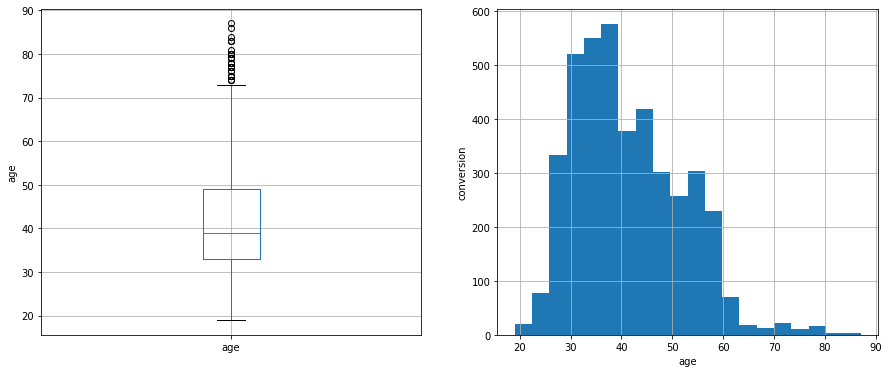

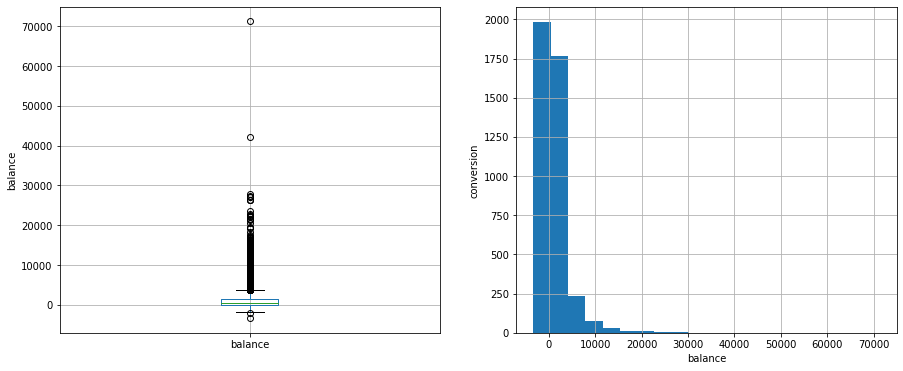

In [20]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('conversion')
    fig.set_xlabel(var)

    plt.show()

In [21]:
# let's have a look at the most extreme outliers
data[data.balance>25000]

,age,job,marital_status,education,default,balance,housing,loan,contact_type,day,month,campaing_contacts,previous_contacts,conversion
871,31,1.0,2,1.0,0,26965.0,0,0,0.0,21,4,2,0,1
1082,43,1.0,2,3.0,0,27733.0,1,0,0.0,3,6,7,0,0
1480,36,2.0,1,3.0,0,27359.0,1,0,0.0,3,6,2,0,0
1795,54,2.0,0,3.0,0,26306.0,1,0,0.0,11,2,1,3,0
2588,42,2.0,1,3.0,0,42045.0,0,0,0.0,8,8,2,0,0
2610,50,2.0,1,2.0,0,26394.0,0,0,0.0,25,8,4,0,0
3299,60,0.0,1,1.0,0,71188.0,0,0,0.0,6,10,1,0,0
3429,57,1.0,1,3.0,0,27069.0,0,1,0.0,20,6,3,0,0
3646,75,0.0,1,2.0,0,26452.0,0,0,1.0,15,7,2,0,0


### most of the clients invest in long terms deposits than keep bank balance in their bank account

In [22]:
data[data.age>75]

,age,job,marital_status,education,default,balance,housing,loan,contact_type,day,month,campaing_contacts,previous_contacts,conversion
36,78,0.0,0,1.0,0,229.0,0,0,1.0,22,10,1,0,1
129,77,0.0,0,3.0,0,4659.0,0,0,0.0,14,4,1,0,1
166,78,1.0,1,2.0,0,499.0,0,0,1.0,16,3,4,0,0
477,77,0.0,1,3.0,0,7802.0,0,0,1.0,4,5,1,2,1
573,81,0.0,1,2.0,0,1.0,0,0,0.0,19,8,5,0,0
633,83,0.0,1,2.0,0,0.0,0,0,0.0,18,3,10,0,0
688,80,2.0,1,1.0,0,6483.0,0,0,1.0,19,10,1,0,0
1021,79,0.0,1,2.0,0,4738.0,0,0,1.0,9,7,5,0,0
1036,77,0.0,1,3.0,0,0.0,0,0,0.0,16,10,1,1,1
1465,86,0.0,1,2.0,0,1503.0,0,0,1.0,18,3,3,1,0


### aged clients >75 are taking long-term deposits after the bank direct tele marketing campaigns. 

### Outlier treatment using capping and flooring

In [23]:
# handling outliersin 'balance' variable using capping and flooring
IQR = data.balance.quantile(0.75) - data.balance.quantile(0.25)
Lower_fence = data.balance.quantile(0.25) - (IQR * 3)
Upper_fence = data.balance.quantile(0.75) + (IQR * 3)
print('balance outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

balance outliers are values < -4202.75 or > 5760.0


In [24]:
#Quantile-based Flooring and Capping
data['balance'] = np.where(data["balance"] <-4202.75,-4202.75, data['balance'])
data["balance"] = np.where(data["balance"] > 5760.0, 5760.0, data['balance'])
print(data['balance'].skew())

1.6442718146390864


In [25]:
# handling outliersin 'balance' variable using capping and flooring
IQR = data.age.quantile(0.75) - data.age.quantile(0.25)
Lower_fence = data.age.quantile(0.25) - (IQR * 3)
Upper_fence = data.age.quantile(0.75) + (IQR * 3)
print('age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

age outliers are values < -15.0 or > 97.0


In [26]:
#Quantile-based Flooring and Capping
data['age'] = np.where(data["age"] <-15.0,-15.0, data['age'])
data["age"] = np.where(data['age'] > 97.0, 97.0, data['age'])
print(data['age'].skew())

0.6906529583726445


# Data Visiualization

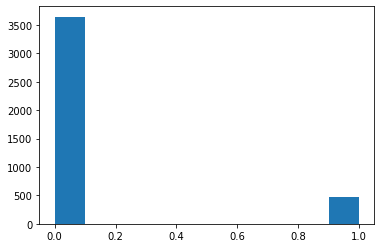

In [27]:
import matplotlib.pyplot as plt # distribution of target variable
plt.hist(data['conversion'])
plt.show() # 

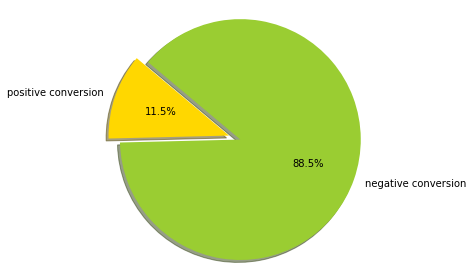

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise
labels = ['positive conversion', 'negative conversion']
sizes = [11.5, 88.5]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.tight_layout()
plt.show()

* postive customer taking up long-terms deposits are very very less
* chart for the customers of a bank that purchase a bank deposit in a marketing campaign, which is a binary variable(target)

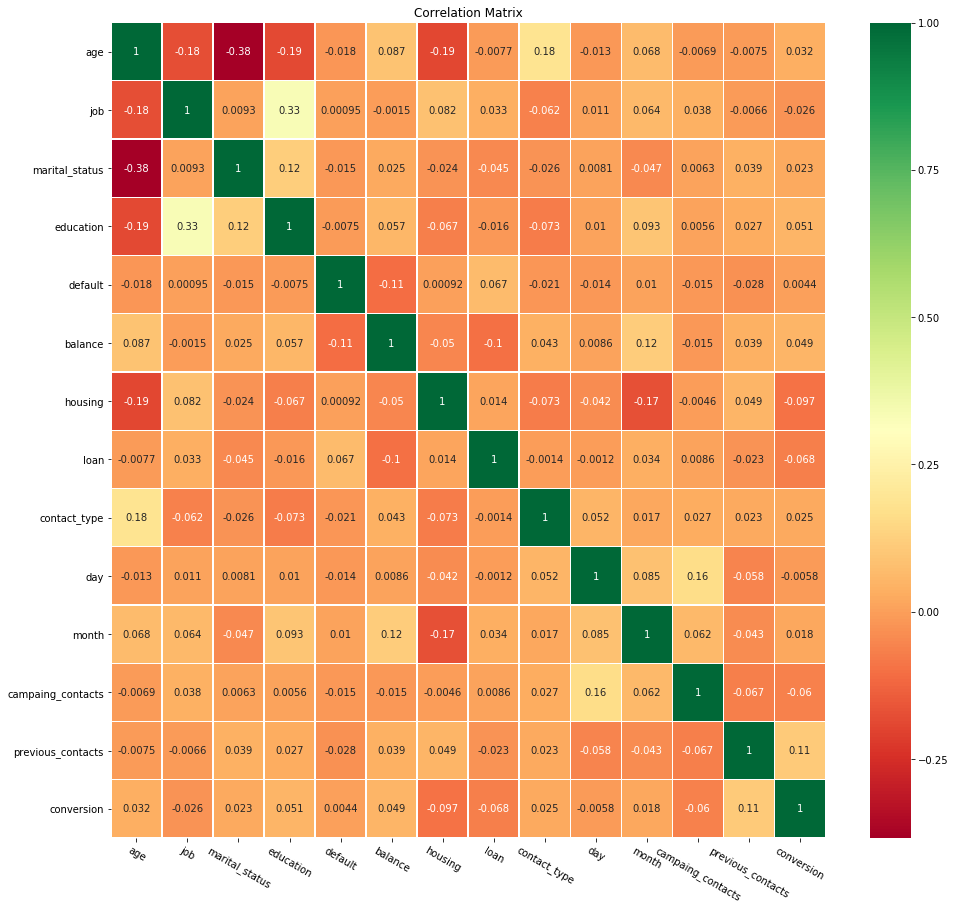

In [29]:
import seaborn as sns
corr = data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(16,15)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

* “conversion” has a +10 correlation with “previous contacts”, +5% with education, +3% with age, 2% wtih marital status.
* "conversion" has -9% correlation with housing, -6% with loan and -6% with campaing_contacts, -2% with job

### Relationship with conversion and each feature

Text(0, 0.5, 'bank balance')

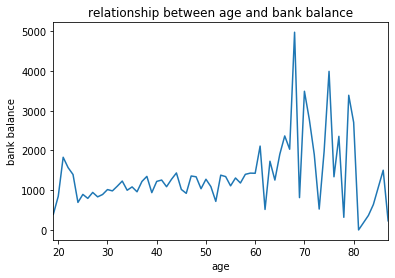

In [31]:
fig = plt.figure()
fig = data.groupby(['age'])['balance'].mean().plot()
fig.set_title('relationship between age and bank balance')
fig.set_ylabel('bank balance')

* target older clients with high balance levels. older clients have higher bank balance

Text(0, 0.5, 'conversion')

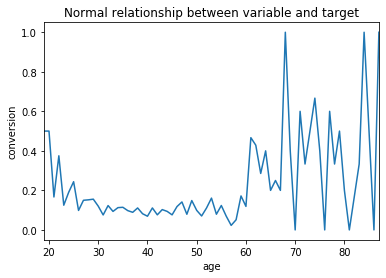

In [32]:
fig = plt.figure()
fig = data.groupby(['age'])['conversion'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('conversion')

Insights: target the youngest and the oldest instead of the middle-aged

Text(0, 0.5, 'conversion')

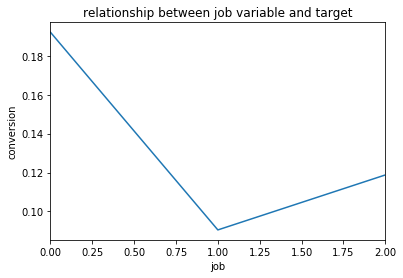

In [33]:
fig = plt.figure()
fig = data.groupby(['job'])['conversion'].mean().plot()
fig.set_title('relationship between job variable and target')
fig.set_ylabel('conversion')#(0=retired, 1=employed, 2=student)

* retired and students are prone to take up long term deposits.(maybe parents take deposits for their dependent students)

Text(0, 0.5, 'conversion')

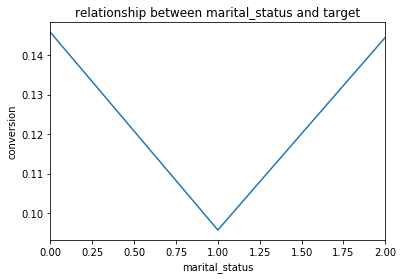

In [34]:
fig = plt.figure()
fig = data.groupby(['marital_status'])['conversion'].mean().plot()
fig.set_title('relationship between marital_status and target')
fig.set_ylabel('conversion')   # 1=married 2540 customers , 2=single 1100 customers, 0=divorced 480 customers


### Divorced and single people are positive conversion for long-term deposited after tele marketing by bank

Text(0, 0.5, 'conversion')

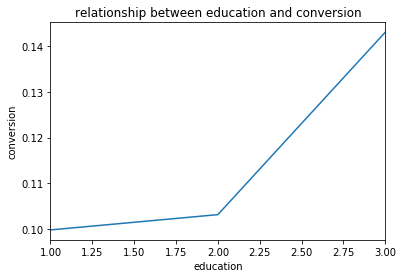

In [35]:
fig = plt.figure()
fig = data.groupby(['education'])['conversion'].mean().plot()
fig.set_title('relationship between education and conversion')
fig.set_ylabel('conversion')  # (1=primary, 2=secondary, 3=tertiary).

* clients with atleast tertiary education are intrested in long term deposits

Text(0, 0.5, 'conversion')

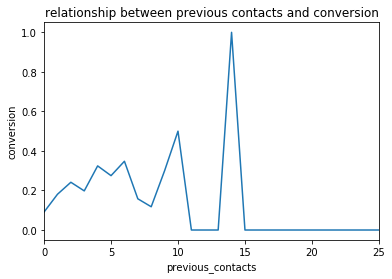

In [36]:
fig = plt.figure()
fig = data.groupby(['previous_contacts'])['conversion'].mean().plot()
fig.set_title('relationship between previous contacts and conversion')
fig.set_ylabel('conversion')

* 14 Number of contacts performed before this campaign and for this client.

Text(0, 0.5, 'conversion')

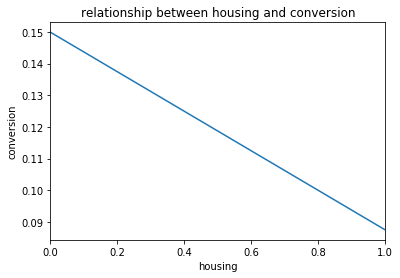

In [37]:
fig = plt.figure()
fig = data.groupby(['housing'])['conversion'].mean().plot()
fig.set_title('relationship between housing and conversion')
fig.set_ylabel('conversion')

* clients with housing loan are not taking long term deposits i.e. having negative relation. Better make less marketing

Text(0, 0.5, 'conversion')

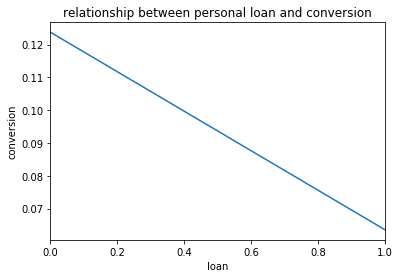

In [38]:
fig = plt.figure()
fig = data.groupby(['loan'])['conversion'].mean().plot()
fig.set_title('relationship between personal loan and conversion')
fig.set_ylabel('conversion')

* clients with personal loans are also not good targets. -ve correlation

Text(0, 0.5, 'conversion')

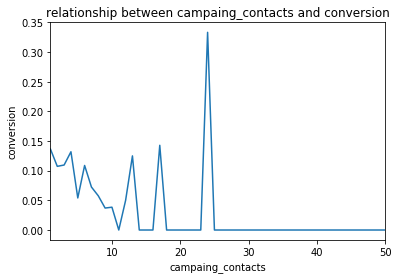

In [39]:
fig = plt.figure()
fig = data.groupby(['campaing_contacts'])['conversion'].mean().plot()
fig.set_title('relationship between campaing_contacts and conversion')
fig.set_ylabel('conversion')

* 25 Number of contacts performed during this campaign and for this client.

Text(0, 0.5, 'conversion')

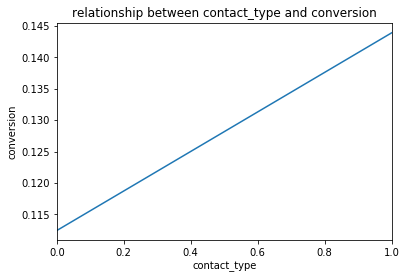

In [40]:
fig = plt.figure()
fig = data.groupby(['contact_type'])['conversion'].mean().plot()
fig.set_title('relationship between contact_type and conversion')
fig.set_ylabel('conversion')

* more conversion rate when contacted over telephone over cellphone. Contact communication type (0=cellular,1=telephone)

Text(0, 0.5, 'conversion')

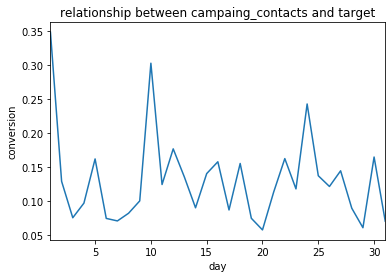

In [41]:
fig = plt.figure()
fig = data.groupby(['day'])['conversion'].mean().plot()
fig.set_title('relationship between campaing_contacts and target')
fig.set_ylabel('conversion')

* its good idea to contact clients on 1,2,3,10 25th days of the month

Text(0, 0.5, 'conversion')

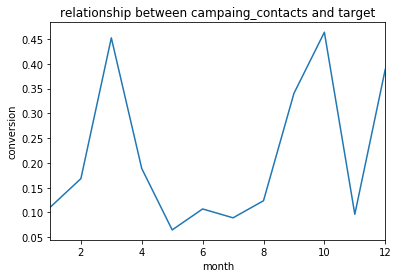

In [42]:
fig = plt.figure()
fig = data.groupby(['month'])['conversion'].mean().plot()
fig.set_title('relationship between campaing_contacts and target')
fig.set_ylabel('conversion')

* most long term deposits are taken in March, October and December months of the year

Text(0, 0.5, 'conversion')

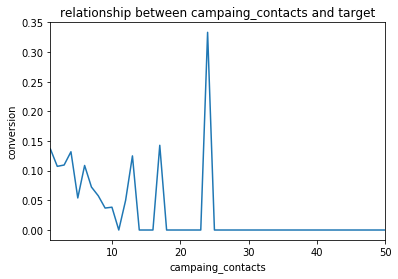

In [43]:
fig = plt.figure()
fig = data.groupby(['campaing_contacts'])['conversion'].mean().plot()
fig.set_title('relationship between campaing_contacts and target')
fig.set_ylabel('conversion')

* Number of contacts performed during this campaign and for this client.

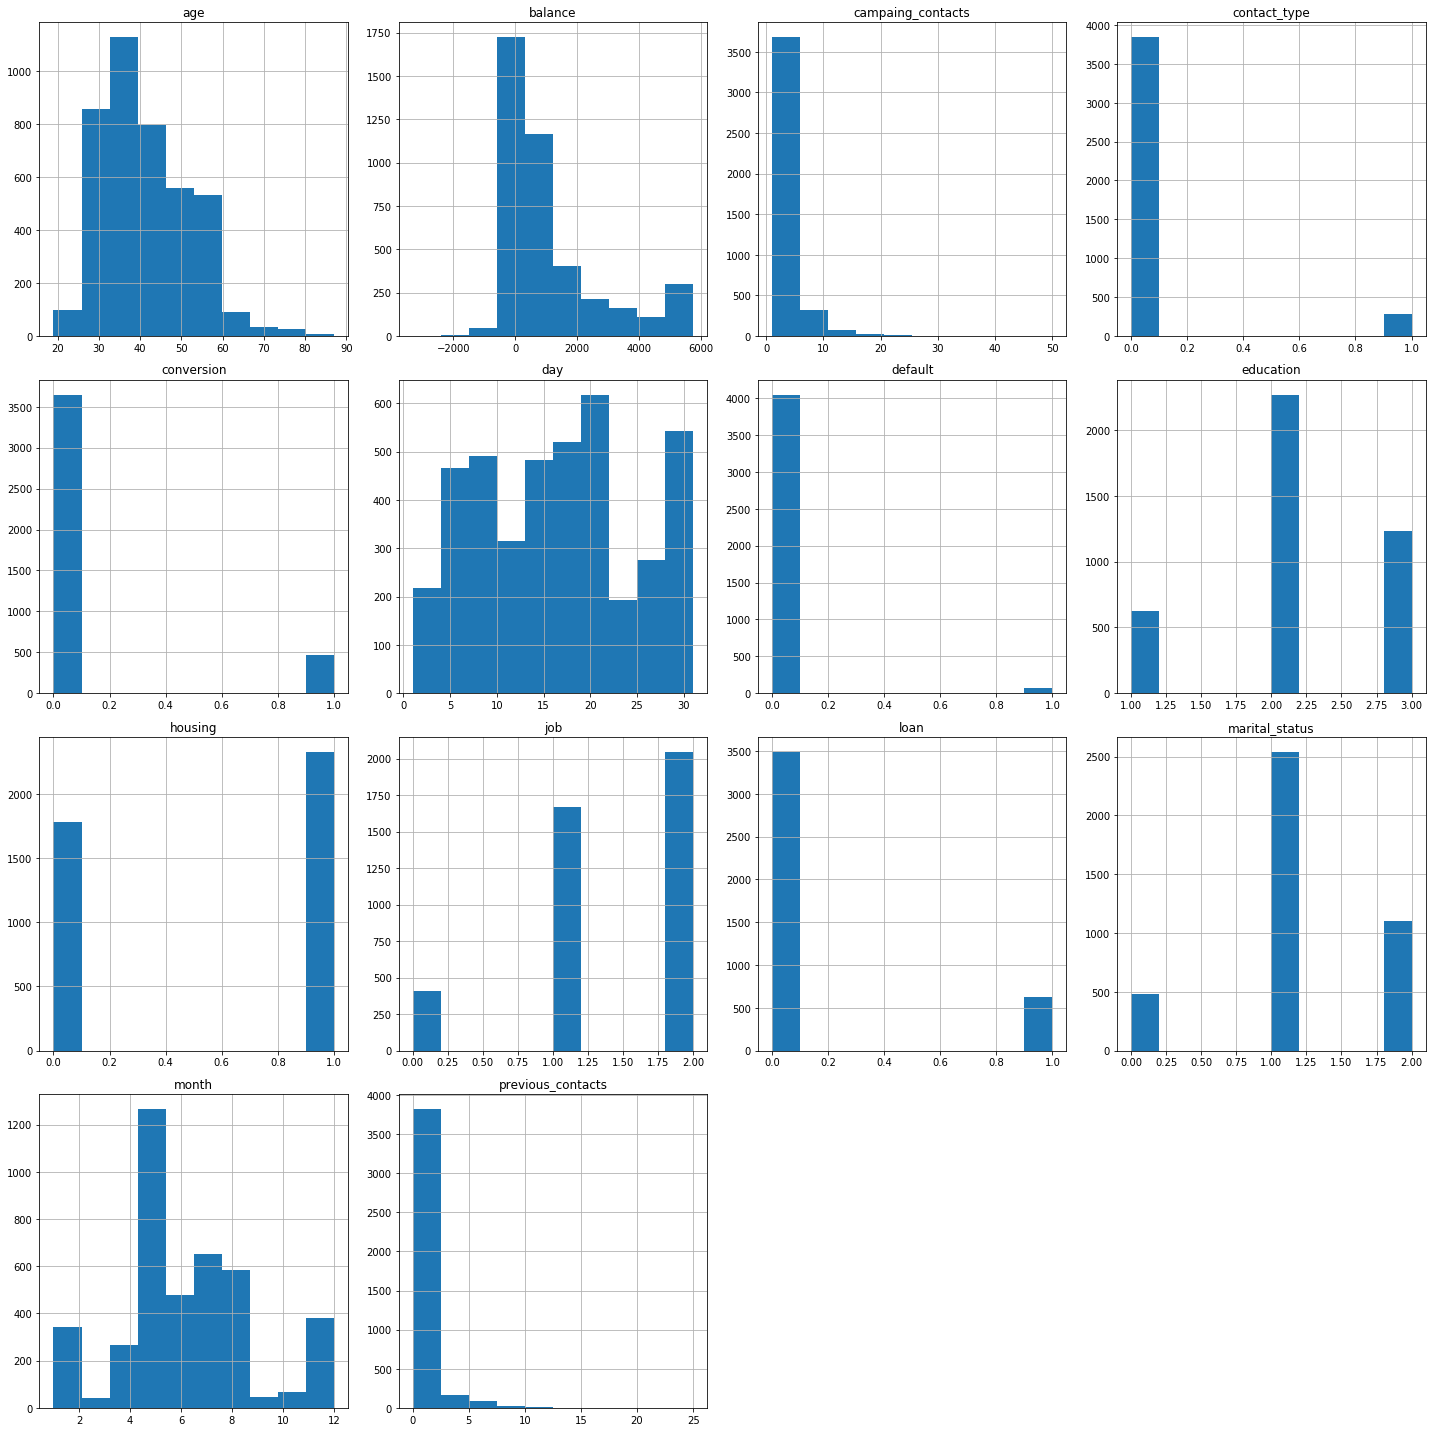

In [44]:
data.hist(figsize=(20, 20))
plt.tight_layout()# tight_layout() will adjust spacing between subplots to minimize the overlaps. let's make good plots
plt.show()

# Splitting the data and ML Model building

In [45]:
# Let's separate into train and test set
# seperating target variable
X=data.iloc[:,:13].values
y=data['conversion'].values.reshape(-1,1)
print(X.shape),(y.shape)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=0)
print('The Shape of X_TRAIN is',X_train.shape)
print('The Shape of X_TEST is',X_test.shape)
print('The Shape of Y_TRAIN is',y_train.shape)
print('The Shape of Y_TEST is',y_test.shape)

(4120, 13)
The Shape of X_TRAIN is (2884, 13)
The Shape of X_TEST is (1236, 13)
The Shape of Y_TRAIN is (2884, 1)
The Shape of Y_TEST is (1236, 1)


In [46]:
# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

pred = logit_model.predict_proba(X_train)
print('Logit train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = logit_model.predict_proba(X_test)
print('Logit test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Logit train roc-auc: 0.6761737153751674
Logit test roc-auc: 0.6269380020398434


In [48]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)

pred = ada_model.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = ada_model.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Adaboost train roc-auc: 0.7776622852847899
Adaboost test roc-auc: 0.6939510799703077


In [49]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

RF train roc-auc: 0.9997280732307956
RF test roc-auc: 0.627396665037206


In [50]:
xgb_model = xgb.XGBClassifier()

eval_set = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=False)

pred = xgb_model.predict_proba(X_train)
print('xgb train roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
pred = xgb_model.predict_proba(X_test)
print('xgb test roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

xgb train roc-auc: 0.8583169871736114
xgb test roc-auc: 0.6857011810572183


# Balancing the Imbalance dataset with over/up sampling

negative_conversion: 3648
postive_conversion: 472
Proportion: 7.73 : 1


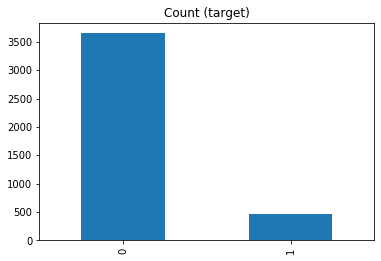

In [55]:
# checking the balance of target variable
target_count = data.conversion.value_counts()
print('negative_conversion:', target_count[0])
print('postive_conversion:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Count (target)');

In [56]:
## Get the left Bank and Continue Banking dataset 
positive_conversion = data[data['conversion']==1]
negative_conversion = data[data['conversion']==0]
print(negative_conversion.shape, positive_conversion.shape)

(3648, 14) (472, 14)


In [57]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [58]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_new,y_new=smk.fit_sample(X,y)
X_new.shape,y_new.shape

((6994, 13), (6994,))

In [59]:
from collections import Counter
#print('Original dataset shape {}'.format(Counter(y)))
print('Up_sampled dataset shape {}'.format(Counter(y_new)))

Up_sampled dataset shape Counter({0: 3497, 1: 3497})


In [60]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
ups =  RandomOverSampler(ratio=0.5)

In [61]:
X_train_new, y_train_new = ups.fit_sample(X, y)
X_train_new.shape,y_train_new.shape

((5472, 13), (5472,))

In [62]:
#print('Original dataset shape {}'.format(Counter(y)))
print('up_sampled dataset shape {}'.format(Counter(y_train_new)))

up_sampled dataset shape Counter({0: 3648, 1: 1824})


In [63]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_train_new, y_train_new, test_size=0.3, random_state=5)
print('The Shape of X_TRAIN is',X_train_new.shape)
print('The Shape of X_TEST is',X_test_new.shape)
print('The Shape of Y_TRAIN is',y_train_new.shape)
print('The Shape of Y_TEST is',y_test_new.shape)

The Shape of X_TRAIN is (3830, 13)
The Shape of X_TEST is (1642, 13)
The Shape of Y_TRAIN is (3830,)
The Shape of Y_TEST is (1642,)


In [64]:
xgb_model_ups = xgb.XGBClassifier()

eval_set = [(X_test_new, y_test_new)]
xgb_model_ups.fit(X_train_new, y_train_new, eval_metric="auc", eval_set=eval_set, verbose=False)

pred_ups = xgb_model_ups.predict_proba(X_train_new)
print('xgb up sample train data roc-auc: {}'.format(roc_auc_score(y_train_new, pred_ups[:,1])))
pred_ups = xgb_model_ups.predict_proba(X_test_new)
print('xgb up sample test data roc-auc: {}'.format(roc_auc_score(y_test_new, pred_ups[:,1])))

xgb up sample train data roc-auc: 0.8559588812123915
xgb up sample test data roc-auc: 0.8165330426031533


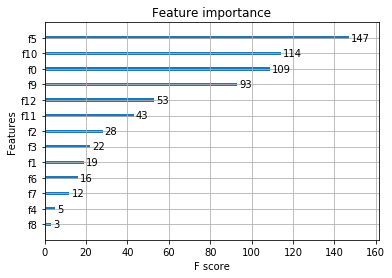

In [113]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(xgb_model_ups)
plt.show()  # balance, month, age, day & previous_contacts are top 5 important features

In [119]:
print(data.columns)

Index(['age', 'job', 'marital_status', 'education', 'default', 'balance',
       'housing', 'loan', 'contact_type', 'day', 'month', 'campaing_contacts',
       'previous_contacts', 'conversion'],
      dtype='object')


# Compare classification algorithms

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [83]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

In [84]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state='seed')    
    # train the model
    cv_results = cross_val_score(model, X_train_new, y_train_new, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.694517 (0.019434)
KNN: 0.712010 (0.017864)
DTree: 0.881462 (0.023301)
NB: 0.677023 (0.025769)
ADA: 0.727154 (0.012426)
RF: 0.932115 (0.009558)
XGB: 0.765274 (0.013387)


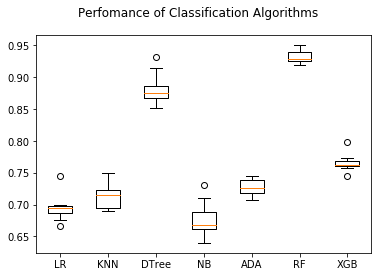

In [85]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

### Random Forest Classifer is the best performing model.
* Among all algorithms, RF achieved an accuracy of about 95%, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.

In [87]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_new,y_train_new)

y_pred_new=clf.predic(X_test_new)

In [104]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?

print("RF up sampled test Accuracy:", metrics.accuracy_score(y_test_new, y_pred_new))



RF up sampled test Accuracy: 0.9658952496954933


# Important observations

* Bank balance, month, age, day & previous_contacts are top 5 important features
* Good targets for bank are students(parents invest in students) or retired people for long term deposits
* clients < 30 or age > 60 are good targets
* tele-marketing can increased in months of March, Oct, December for investments
* Bank can reduce the tele marketing for clients who are having house loan and personal loan 